<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/DL_7_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

### 하이퍼 파라미터(Hyper Parameter)

In [ ]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [ ]:
def sigmoid(x):
  return 1 / ( 1+ np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1,-1)

  delta = 1e-7
  return -np.sum(true_y * np.nog(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1,-1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.nog(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential(f,x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value


### 신경망

In [ ]:
class LogicGateNet():

  def __init__(self):
    def weight_init():
      np.random.seed(1)
      weights = np.random.randn(2)
      bias = np.random.randn(1)

      return weights, bias
    
    self.weights, self.bias = weight_init()

  def predict(self, x):
    W = self.weights.reshape(-1, 1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)
    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grad_W = differential(loss_grad, self.weights)
    grad_B = differential(loss_grad, self.bias)

    return grad_W, grad_B

### AND Gate

#### 모델 생성 및 학습

In [ ]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X,Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{}, cost{}, weights:{}, bias:{}".format(i+1, loss, AND.weights, AND.bias))


epoch:100, cost0.6577750894433896, weights:[1.67482908 0.88530433], bias:[-2.28862113]
epoch:200, cost0.47868977133966595, weights:[2.09135904 1.77863168], bias:[-3.18138225]
epoch:300, cost0.38199016604274594, weights:[2.48831035 2.35058578], bias:[-3.87281609]
epoch:400, cost0.3187565601477237, weights:[2.84364946 2.77715285], bias:[-4.4409907]
epoch:500, cost0.2734944624920833, weights:[3.15762639 3.12296452], bias:[-4.9246414]
epoch:600, cost0.23932824253066776, weights:[3.43596333 3.41670603], bias:[-5.34611966]
epoch:700, cost0.21258557987441473, weights:[3.68466966 3.67338294], bias:[-5.71968047]
epoch:800, cost0.1910811613144657, weights:[3.90883856 3.90191691], bias:[-6.05506817]
epoch:900, cost0.17341918260176764, weights:[4.11255132 4.10813902], bias:[-6.35928329]
epoch:1000, cost0.15866164667676708, weights:[4.29903862 4.29613042], bias:[-6.63754517]


#### 테스트

In [ ]:
print(AND.predict(X))

[[0.00130853]
 [0.0877506 ]
 [0.08798368]
 [0.87627557]]


### OR Gate

#### 모델 생성 및 학습

In [ ]:
OR = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X,Y)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{}, cost{}, weights:{}, bias:{}".format(i+1, loss, OR.weights, OR.bias))


epoch:100, cost0.46966462715458934, weights:[2.54994249 1.53146817], bias:[-0.23756388]
epoch:200, cost0.3266420878925113, weights:[3.0654972  2.48433435], bias:[-0.73035494]
epoch:300, cost0.24939860658163646, weights:[3.51580354 3.15251285], bias:[-1.07599499]
epoch:400, cost0.2010254578313214, weights:[3.90753746 3.66348045], bias:[-1.33653642]
epoch:500, cost0.16790857594726685, weights:[4.24924729 4.07584073], bias:[-1.5458389]
epoch:600, cost0.14386201735355925, weights:[4.54980861 4.42109728], bias:[-1.72093619]
epoch:700, cost0.12564774324952763, weights:[4.81676763 4.71787029], bias:[-1.87147318]
epoch:800, cost0.11140046771464229, weights:[5.05614319 4.97800846], bias:[-2.0034682]
epoch:900, cost0.09996929350126772, weights:[5.27265436 5.20949965], bias:[-2.12094969]
epoch:1000, cost0.09060611328418659, weights:[5.47000342 5.41797969], bias:[-2.22675613]


#### 테스트

In [ ]:
print(OR.predict(X))

[[0.09737338]
 [0.96050267]
 [0.9624297 ]
 [0.99982686]]


### NAND Gate

#### 모델 생성 및 학습

In [ ]:
NAND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X,Y)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{}, cost{}, weights:{}, bias:{}".format(i+1, loss, NAND.weights, NAND.bias))

epoch:100, cost0.824288748305992, weights:[-0.40813162 -1.15743385], bias:[1.62622569]
epoch:200, cost0.5578027743859468, weights:[-1.46187375 -1.73868146], bias:[2.70926709]
epoch:300, cost0.42989582787243724, weights:[-2.10463937 -2.21939554], bias:[3.50143234]
epoch:400, cost0.3513789539649579, weights:[-2.57292664 -2.62562358], bias:[4.13292997]
epoch:500, cost0.2972825383968322, weights:[-2.94747465 -2.97382709], bias:[4.66077837]
epoch:600, cost0.25748055791697105, weights:[-3.26268809 -3.27683177], bias:[5.11516759]
epoch:700, cost0.22689955273940252, weights:[-3.53617405 -3.54422649], bias:[5.51431484]
epoch:800, cost0.20265540741223503, weights:[-3.77827069 -3.78308875], bias:[5.87021703]
epoch:900, cost0.1829670479710293, weights:[-3.99567763 -3.99868484], bias:[6.19126741]
epoch:1000, cost0.1666679983329244, weights:[-4.19305086 -4.19499713], bias:[6.48360098]


#### 테스트

In [ ]:
print(NAND.predict(X))

[[0.99847403]
 [0.90792881]
 [0.90809137]
 [0.12960599]]


### XOR Gate

#### 모델 생성 및 학습

In [ ]:
XOR = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X,Y)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{}, cost{}, weights:{}, bias:{}".format(i+1, loss, XOR.weights, XOR.bias))

epoch:100, cost1.4066709266956385, weights:[ 0.55458224 -0.1127766 ], bias:[-0.26306006]
epoch:200, cost1.3887878884306644, weights:[0.19613306 0.00555485], bias:[-0.11966087]
epoch:300, cost1.3866676758126297, weights:[0.07299372 0.01879835], bias:[-0.0544414]
epoch:400, cost1.386360043466884, weights:[0.02858176 0.01317575], bias:[-0.02476527]
epoch:500, cost1.3863070165433458, weights:[0.01168694 0.00730766], bias:[-0.01126515]
epoch:600, cost1.386296904064606, weights:[0.00494248 0.00369764], bias:[-0.0051242]
epoch:700, cost1.3862948811673228, weights:[0.00214199 0.00178814], bias:[-0.00233085]
epoch:800, cost1.3862944682279597, weights:[0.00094414 0.00084356], bias:[-0.00106023]
epoch:900, cost1.3862943832414318, weights:[0.00042088 0.00039229], bias:[-0.00048227]
epoch:1000, cost1.3862943656937712, weights:[0.00018901 0.00018088], bias:[-0.00021937]


#### 테스트

In [ ]:
print(XOR.predict(X))

[[0.49994516]
 [0.49999038]
 [0.49999241]
 [0.50003763]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])
S1 = NAND.predict(X)
S2 = OR.predict(X)
X_2 = np.array([S1,S2]).T.reshape(-1,2)
print(X_2.shape)

(4, 2)


#### 테스트

In [ ]:
print(AND.predict(X_2))

[[0.12711207]
 [0.80093056]
 [0.80235811]
 [0.14368961]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [ ]:
class XORNet():

  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['W_1'] = np.random.randn(2)
      params['W_2'] = np.random.randn(2)
      params['B_1'] = np.random.randn(2)
      params['B_2'] = np.random.randn(2)
      return params

    self.params = weight_init()

  def predict(self, x):
    W_1, W_2 = self.params['W_1'].reshape(-1,1), self.params['W_2'].reshape(-1,1)
    B_1, B_2 = self.params['B_1'], self.params['B_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W_2) + B_2 
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['W_1'] = differential(loss_grad, self.params['W_1'])
    grads['B_1'] = differential(loss_grad, self.params['B_1'])
    grads['W_2'] = differential(loss_grad, self.params['W_2'])
    grads['B_2'] = differential(loss_grad, self.params['B_2'])

    return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [ ]:
lr = 0.3

#### 모델 생성 및 학습

In [ ]:
XOR1 = XORNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR1.get_gradient(X, Y)

  for key in('W_1', 'B_1', 'W_2', 'B_2'):
    XOR1.params[key] -= lr * grads[key]

  loss = XOR1.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{}, cost{}".format(i+1, loss))

epoch:100, cost2.7115628242984715
epoch:200, cost0.8071643171284111
epoch:300, cost0.27937411307443005
epoch:400, cost0.16042474919909983
epoch:500, cost0.11118395789374262
epoch:600, cost0.0846882995591919
epoch:700, cost0.06824108499430785
epoch:800, cost0.05707336605668041
epoch:900, cost0.04900970563242715
epoch:1000, cost0.042921018197818794


#### 테스트

In [ ]:
print(XOR1.predict(X))

[[0.00864374 0.00864374]
 [0.98306794 0.98306794]
 [0.99154149 0.99154149]
 [0.0086307  0.0086307 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

#프로세스 상태바
from tqdm.notebook import tqdm

#### 데이터 로드

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### 데이터 확인

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


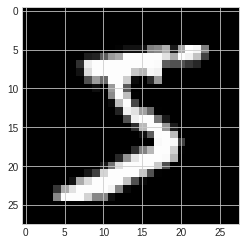

In [ ]:
img = X_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [ ]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx, :] = data.flatten()

  return temp

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = flatten_for_mnist(X_train)
X_test = flatten_for_mnist(X_test)

print(X_train.shape)
print(X_test.shape)

y_train_ohe = tf.one_hot(y_train, depth =10).numpy()
y_test_ohe = tf.one_hot(y_test, depth =10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


#### 하이퍼 파라미터(Hyper Parameter)

In [ ]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = X_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [ ]:
def sigmoid(x):
  return 1 / ( 1+ np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1,-1)

  delta = 1e-7
  return -np.sum(true_y * np.nog(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1,-1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.nog(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential_1d(f,x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

def differential_2d(f, x):
  if X.ndim == 1 :
    return differential_1d(f, X)
  else :
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential_1d(f, x)

    return grad
    


#### 2층 신경망으로 구현

In [ ]:
class Mymodel():

  def __init__(self):
    
    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777)

      params = {}
      params['W_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['B_1'] = np.zeros(hidden_nodes)
      params['W_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
      params['B_2'] = np.zeros(output_units)
      return params

    self.params = weight_init(784, 64, 10)

  def predict(self, x):

    W_1, W_2 = self.params['W_1'], self.params['W_2']
    B_1, B_2 = self.params['B_1'], self.params['B_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W_2) + B_2 
    pred_y = softmax(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis=1)
    t_argmax = np.argmax(true_y, axis=1)

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

    return accuracy

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['W_1'] = differential(loss_grad, self.params['W_1'])
    grads['B_1'] = differential(loss_grad, self.params['B_1'])
    grads['W_2'] = differential(loss_grad, self.params['W_2'])
    grads['B_2'] = differential(loss_grad, self.params['B_2'])

    return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [ ]:
model = Mymodel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
  batch_idx = np.random.choice(train_size, batch_size)
  x_batch = X_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch, y_batch)

  for key in grads.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  train_accuracy = model.accuracy(X_train, y_train_ohe)
  test_accuracy = model.accuracy(X_test, y_test_ohe)

  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy)

  print("epoch:{}, cost:{}, Train Acc:{}, Test Acc:{}".format(i+1, loss, train_accuracy, test_accuracy))

end_time = time.time()

print("학습시간{:.3f}s".format(end_time-start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

epoch:1, cost:343.2346011215503, Train Acc:0.10441666666666667, Test Acc:0.1028
epoch:2, cost:343.9076522236759, Train Acc:0.09751666666666667, Test Acc:0.0974
학습시간5.236s


In [ ]:
pred_y = model.predict(X_test)
print(model.predict(X_test))
print(model.accuracy(X_test, y_test_ohe))

[[7.16528596e-06 9.99546563e-06 1.11801426e-05 ... 1.15695695e-05
  1.31146921e-05 8.45261875e-06]
 [7.09254857e-06 9.90776971e-06 1.11767530e-05 ... 1.14669479e-05
  1.30337010e-05 8.36488541e-06]
 [7.14158230e-06 9.98843840e-06 1.11903131e-05 ... 1.15172482e-05
  1.30917922e-05 8.40416479e-06]
 ...
 [7.14164291e-06 9.97629373e-06 1.11983316e-05 ... 1.15181921e-05
  1.30736571e-05 8.41780347e-06]
 [7.12667179e-06 9.94950474e-06 1.11774754e-05 ... 1.14737808e-05
  1.30481475e-05 8.37129794e-06]
 [7.08785449e-06 9.89970290e-06 1.11835286e-05 ... 1.14157055e-05
  1.30307390e-05 8.34078535e-06]]
0.0974


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재